<a href="https://colab.research.google.com/github/paulesta55/Notebooks/blob/master/easyLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!cp "/gdrive/My Drive/winequality-white.csv" .

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

In [0]:
dataFrame = pd.read_csv("winequality-white.csv",sep=';')
#Extract inputs
y = dataFrame[['quality']].values
x = dataFrame[['fixed acidity','volatile acidity','citric acid','residual sugar'
               ,'chlorides','free sulfur dioxide','total sulfur dioxide','density'
              ,'pH','sulphates','alcohol']].values
dataFrame.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


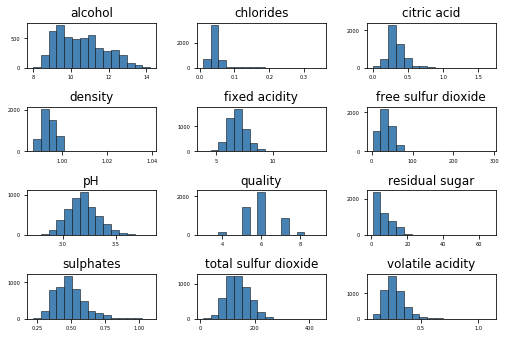

In [0]:
dataFrame.hist(bins=15, color='steelblue', edgecolor='black', linewidth=0.5,
           xlabelsize=5, ylabelsize=5, grid=False) 
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

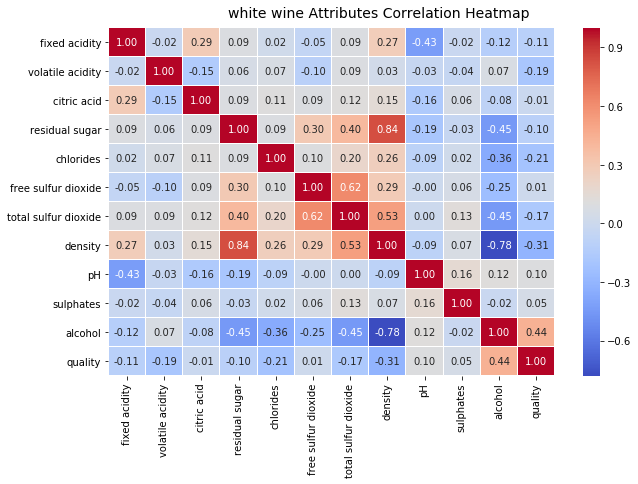

In [0]:
f, ax = plt.subplots(figsize=(10, 6))
corr = dataFrame.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('white wine Attributes Correlation Heatmap', fontsize=14)

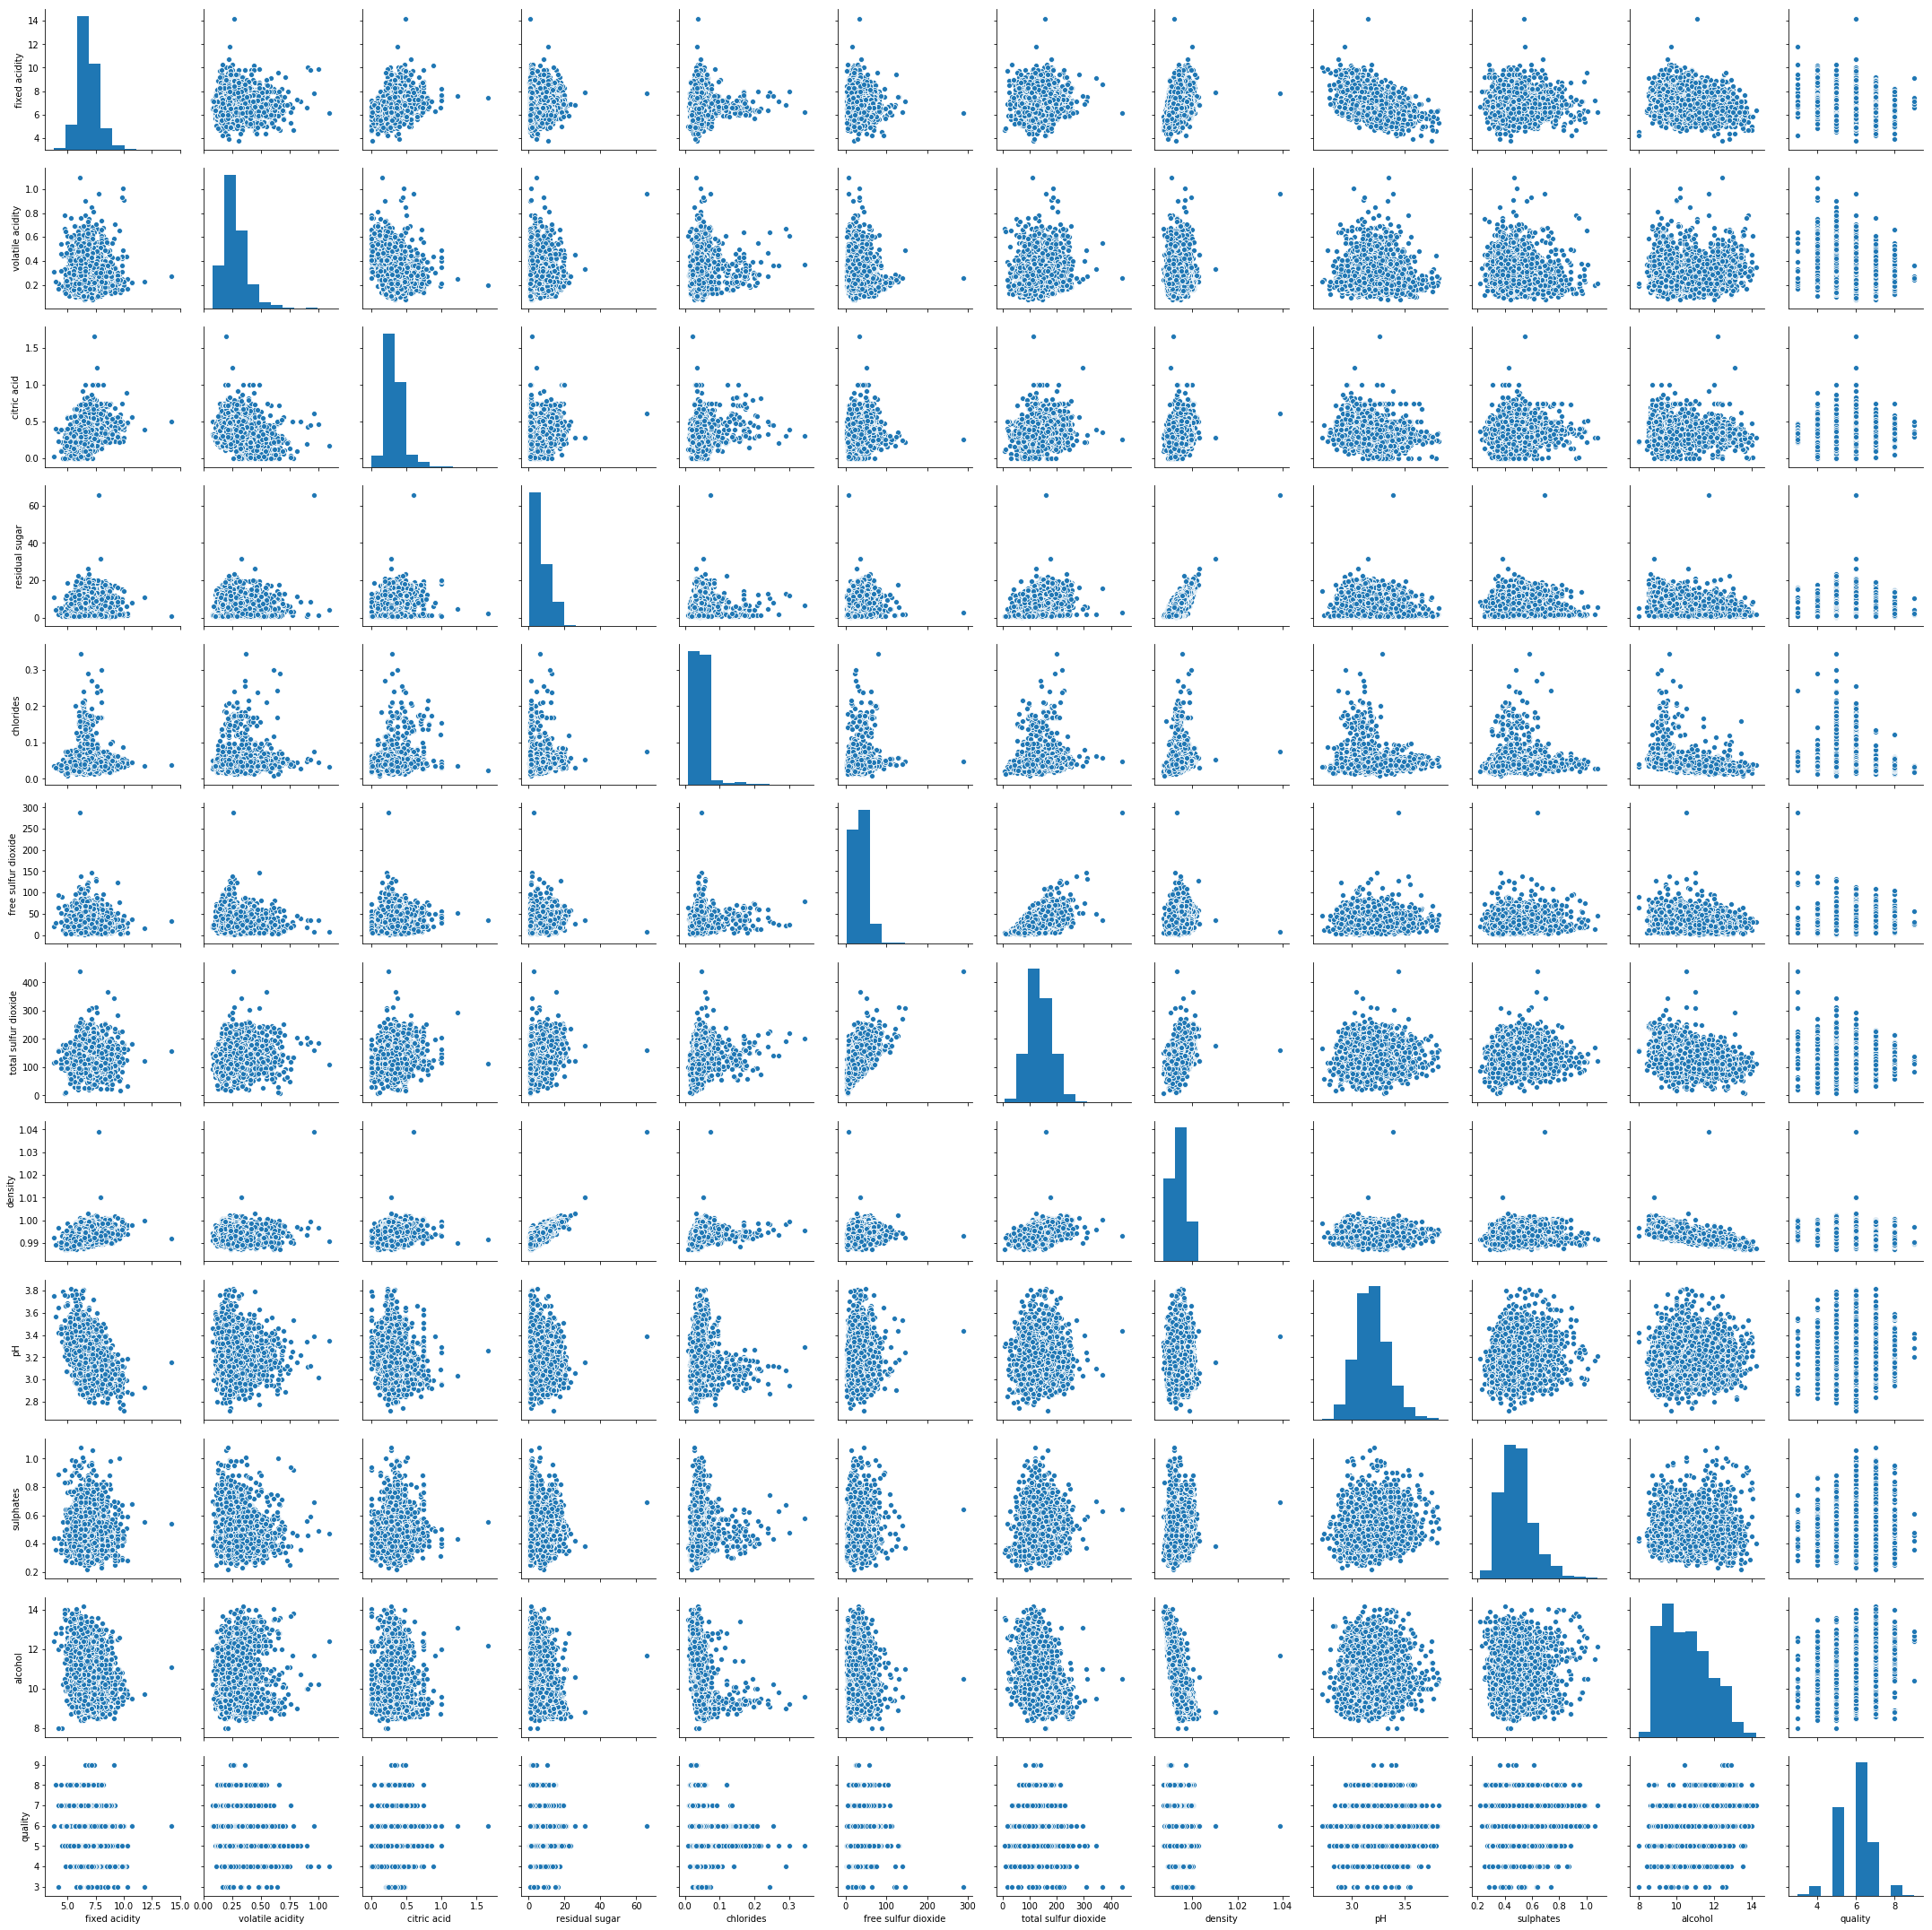

In [0]:
sns.pairplot(data=dataFrame)


In [0]:

theta = np.random.rand(x.shape[1]+1,1)


# TODO : input normalization
# mu = mean(X);
# sigma = std(X);
# X_norm = [(X(:,1)-mu(1))/sigma(1) (X(:,2)-mu(2))/sigma(2)];

def featureNorm(z):
  x_norm = []
  for i in range(z.shape[1]):
    features_i = z[:,i]
    mu_i = np.mean(features_i)
    sigma_i = np.std(features_i)
    x_norm.append((features_i-mu_i)/sigma_i)
  x_norm = np.array(x_norm).reshape(x.shape)
  return x_norm

x_norm = featureNorm(x)

y = y.astype(float)

print("shape y :{}".format(y.shape))

x_norm = np.concatenate((np.ones([x.shape[0],1]),x_norm),axis=1).astype(float)
print("shape x :{}".format(x_norm.shape))
print("theta shape :{}".format(theta.shape))

shape y :(4898, 1)
shape x :(4898, 12)
theta shape :(12, 1)


In [0]:
#A is an n × m matrix and B is an m × p matrix =>  n x p result

#g =(1+exp(-z)).^(-1);
def sigmoid(z):
  return 1/(1+np.exp(-z))

# %COSTFUNCTION Compute cost and gradient for logistic regression
# %   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
# %   parameter for logistic regression and the gradient of the cost
# %   w.r.t. to the parameters.

# regTerm = sum(theta(2:length(theta)).*theta(2:length(theta)))*lambda/(2*m);
  
def activation(theta,x):
  return sigmoid(x.dot(theta))#shape : x.shape[0] x 1

def costFunc(theta,x,y,l):
  m = x.shape[0]
  theta = theta.reshape((x.shape[1],1))
#   print("theta shape {0}".format(theta.shape))
  e = activation(theta,x)
  e = e.reshape((e.shape[0],1))
#   print("e ={}".format(e.shape))
#   print("e shape {0}".format(e.shape))
  r = np.square(theta[1:]).sum()*l/(2*m)
#   print("r shape {0}".format(r.shape))
#######shape = 1 x x.shape[1]
  a = -y.T.dot(np.log(e))
#   print("a shape: {}".format(a.shape))
  b=(1-y).T.dot(np.log(1-e))
#   print("b shape: {}".format(b.shape))
  J = a-b
#   print("J shape :{0}".format(J.shape))
  J = J.sum()/m + r
#   print(grad.T.shape)
#   print(J)
  return J
 
def gradFunc(theta,x,y):
  m = x.shape[0]
  e = activation(theta,x)
  e = e.reshape((e.shape[0],1))
#   print("e ={}".format(e.shape))
#   print("x shape {}".format(x.shape))
  a = (e-y).T
#   print("a shape {}".format(a.shape))
  grad = a.dot(x)*float(1/m)
#   print("grad shape {}".format(grad.shape))
  return grad.T.flatten()
  
  
J = costFunc(theta,x_norm,y,0.01)
print(J)



def oneVsAll(x, y, num_labels, l):
#   x = np.concatenate((np.ones([x.shape[0],1]),x),axis=1).astype(float)
  m = x.shape[0]
  n = x.shape[1]
  all_theta = []
  for k in range(3,num_labels):
    theta_init = np.zeros((n,1))
#     results = minimize(lambda t:costFunc(t,x,y==k,l), theta_init,method='BFGS',options={'maxiter':10000,'disp':True})
    results = minimize(lambda t:costFunc(t,x,y==k,l), theta_init,
                       jac=lambda t:gradFunc(t,x,y==k),method='BFGS',
                       options={'disp':True,'maxiter':200000,'eps':0.001})

    all_theta.append(results['x'])
  return np.array(all_theta)
  
def predict(x,all_theta):
#   x = np.concatenate((np.ones([x.shape[0],1]),x),axis=1).astype(float)
  all_h = x.dot(all_theta.T)
  all_h = sigmoid(all_h)
  pred = np.argmax(all_h,1)
  p =np.max(all_h,1)
  return pred,p
  


results = oneVsAll(x_norm,y,9,0.01)
print(results)
predictions = predict(x_norm,results)
print(predictions[0])

-2.4558938135277146
Optimization terminated successfully.
         Current function value: 0.025463
         Iterations: 49
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 0.144777
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.606687
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.686201
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.469349
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.153545
         Iterations: 29
         Functio

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=1000000).fit(x, y.flatten())
clf.predict(x)

array([5., 5., 6., ..., 5., 6., 6.])

In [0]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x)

x_test = scaler.transform(x)
clf = svm.SVC(C=1,gamma=3,degree=4,max_iter=100000,kernel='rbf',verbose=True)
clf.fit(x_train, y.flatten()) 
clf.predict(x_test)

[LibSVM]

array([6, 6, 6, ..., 6, 7, 6])

In [0]:
clf.score(x_test,y)

0.9895875867701103

In [0]:
from sklearn import svm

from sklearn import decomposition
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit

pca =  decomposition.PCA(n_components=4)
pca.fit(x)
x_pca = pca.transform(x)
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
clf = svm.SVC(C=10,gamma=1,degree=3,max_iter=100000,kernel='rbf',verbose=True)
scores = cross_val_score(clf, x_pca,y.flatten(), cv=cv,scoring='f1_macro')
print(np.mean(scores))




[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[LibSVM]0.3376110006262521


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print(scores)

[0.35774998 0.32755682 0.31579836 0.36059422 0.32635563]


In [0]:
def fine_tune(x,y):
  best_score = 0
  best_c = None
  best_clf = None
  for c in [0.01,0.03,0.06,0.1,0.3,0.6,1,3,6,10,30,60]:
    clf = svm.SVC(C=c,gamma=1,degree=3,max_iter=100000,kernel='rbf',verbose=True)
    scores = cross_val_score(clf, x_pca,y.flatten(), cv=3,scoring='f1_micro')
    tmp_score = np.mean(scores)
    if(tmp_score > best_score):
      best_c = c
      best_score = tmp_score
      print("best C = {}".format(best_c))
      print('best score = {}'.format(best_score))
      best_clf = clf
  return best_c,best_clf


best_c,clf = fine_tune(x_pca,y.flatten())


[LibSVM][LibSVM][LibSVM]best C = 0.01
best score = 0.4487555194329013
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]best C = 0.3
best score = 0.4491637660138362
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]best C = 1
best score = 0.449167268144883
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[LibSVM]

<bound method ClassifierMixin.score of SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
    max_iter=100000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)>